In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("zoo.csv")

In [4]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.shape

(101, 18)

In [6]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [9]:
from sklearn.cluster import KMeans

In [10]:
df_new=df.iloc[:,1:]

In [11]:
df_new.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
sse=[]
k_range=range(1,30)
for k in k_range:
    cls=KMeans(n_clusters=k)
    cls.fit(df_new)
    sse.append(cls.inertia_)

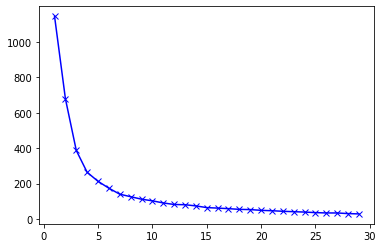

In [13]:
plt.plot(k_range,sse,'bx-')
plt.show()

In [14]:
cl=KMeans(n_clusters=5,random_state=1)

In [15]:
labels=cl.fit_predict(df_new)

In [16]:
df["labels"]=pd.Series(labels)

In [17]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,labels
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,0


In [18]:
df[["animal_name","labels"]].head()

,animal_name,labels
0,aardvark,0
1,antelope,0
2,bass,1
3,bear,0
4,boar,0


In [19]:
df['labels'].value_counts()

0    38
3    22
1    19
2    18
4     4
Name: labels, dtype: int64

In [20]:
df0=df[df.labels==0]
df1=df[df.labels==1]
df2=df[df.labels==2]
df3=df[df.labels==3]
df4=df[df.labels==4]

In [21]:
df0.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,labels
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,0
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0


In [22]:
df1.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,labels
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,1
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4,1


In [23]:
df2.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,labels
14,crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7,2
15,crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,2
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6,2
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5,2
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5,2


In [24]:
df3.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,labels
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,3
16,crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2,3
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,3
21,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2,3
23,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2,3


In [25]:
df4.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,labels
13,clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7,4
77,seawasp,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7,4
81,slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,4
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,4


In [26]:
from sklearn.decomposition import PCA

In [27]:
pc=PCA(n_components=3,random_state=1)

In [29]:
df_pc=pc.fit_transform(df.drop(["animal_name","labels"],axis=1))

In [30]:
pc1=df_pc[:,0]
pc2=df_pc[:,1]
pc3=df_pc[:,2]

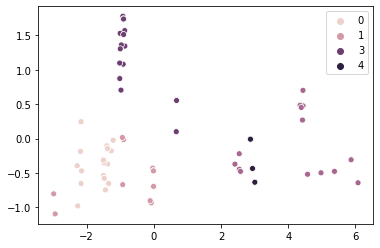

In [31]:
sns.scatterplot(pc1,pc3,hue=df["labels"].tolist())

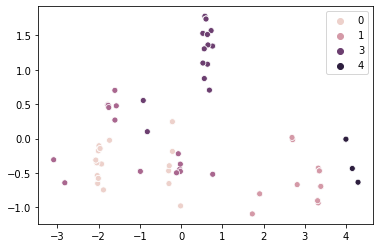

In [32]:
sns.scatterplot(pc2,pc3,hue=df["labels"].tolist())

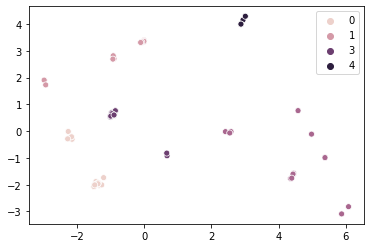

In [33]:
sns.scatterplot(pc1,pc2,hue=df["labels"].tolist())

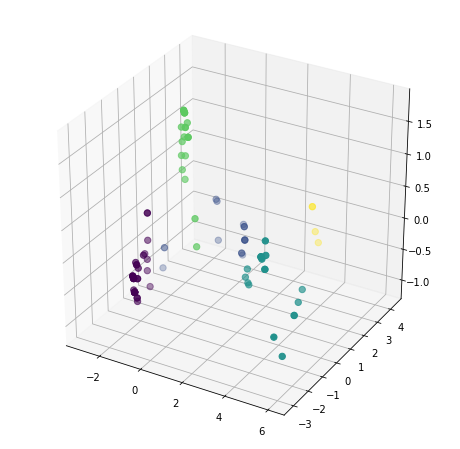

In [34]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca(projection='3d')
ax.scatter(pc1,pc2,pc3,s=40,c=df["labels"].tolist())